In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd '../HOTS'

/home/antoine/homhots/HOTS/HOTS


In [9]:
from mix_Network import network, histoscore

%mkdir -p ../Records
%mkdir -p ../Records/EXP_03_NMNIST

# Testing HOTS on N-MNIST with Lagorce 2017 methodology

- loading 15 random digits instead of 3 cycles with 5 digits for learning clusters

In [3]:
hots = network(krnlinit='first', tau=1, homeo=False)
hots = hots.learning1by1()

2021-02-16_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[1000.0, 10000.0, 100000.0]_[2, 4, 8]_True


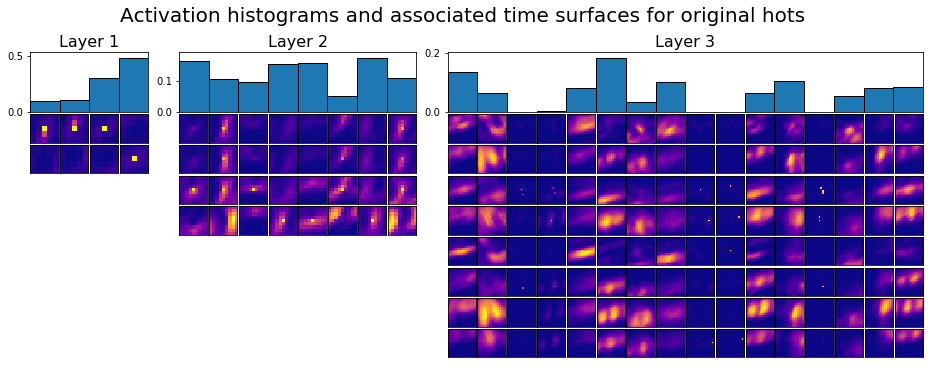

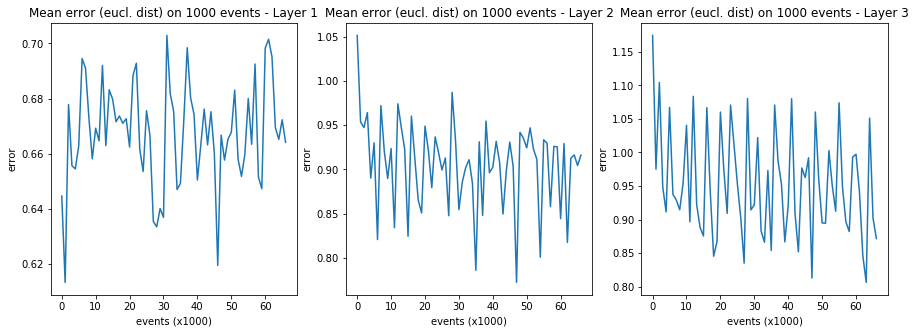

In [4]:
hots.plotlayer()
hots.plotconv()

In [5]:
trainmap = hots.running()
testmap  = hots.running(train=False)

../Records/EXP_03_NMNIST/train/2021-02-16_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[1000.0, 10000.0, 100000.0]_[2, 4, 8]_True_500_[None, None]_histo.pkl
../Records/EXP_03_NMNIST/test/2021-02-16_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[1000.0, 10000.0, 100000.0]_[2, 4, 8]_True_500_[None, None]_histo.pkl


In [11]:
histoscore(trainmap,testmap)

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 71.6% - eucli = 68.8% - norm = 68.8%
Classification scores with kNN: 3-NN = 67.80000000000001% - 6-NN = 68.4%
Classification scores with entropy: Kullback-Leibler = 70.6% - Jensen-Shannon = 71.39999999999999%
----------------------------------------------------------------------------------------------------


0.714

## Adding Homeostasis

2021-02-16_lagorce_first_None_True_[0.25, 1]_[4, 8, 16]_[1000.0, 10000.0, 100000.0]_[2, 4, 8]_True
no jitter


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

2021-02-16_lagorce_first_None_True_[0.25, 1]_[4, 8, 16]_[1000.0, 10000.0, 100000.0]_[2, 4, 8]_True


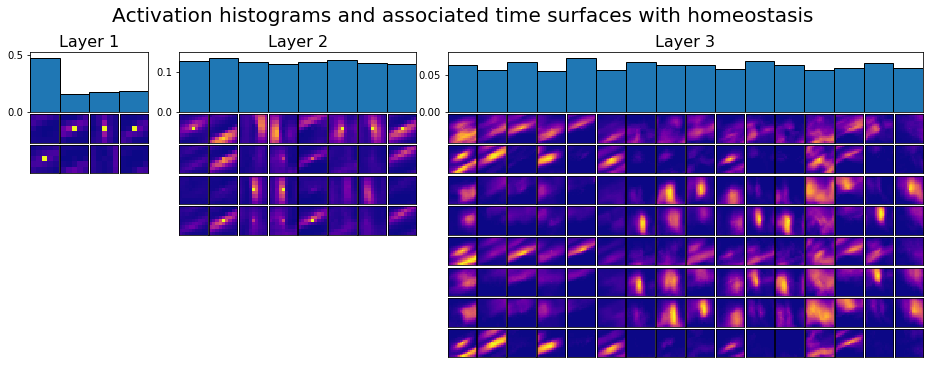

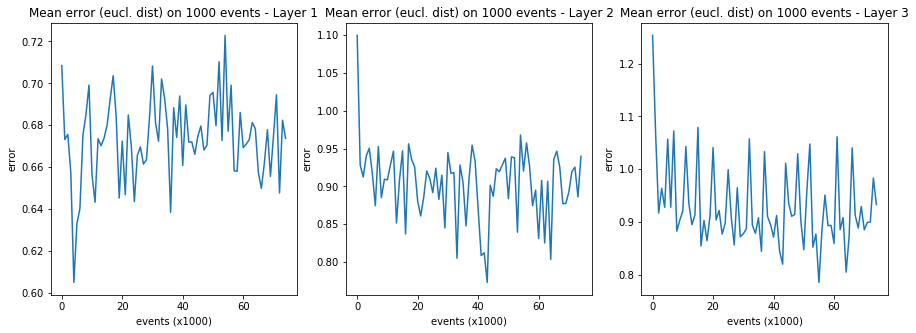

In [12]:
homhots = network(krnlinit='first', tau=1, homeo=True)
homhots = homhots.learning1by1()
homhots.plotlayer()
homhots.plotconv()

In [13]:
trainmaphom = homhots.running(homeotest=True)
testmaphom = homhots.running(homeotest=True, train = False)
histoscore(trainmaphom,testmaphom)

../Records/EXP_03_NMNIST/train/2021-02-16_lagorce_first_None_True_[0.25, 1]_[4, 8, 16]_[1000.0, 10000.0, 100000.0]_[2, 4, 8]_True_500_[None, None]_homeo_histo.pkl
no jitter


  0%|          | 0/500 [00:00<?, ?it/s]

../Records/EXP_03_NMNIST/test/2021-02-16_lagorce_first_None_True_[0.25, 1]_[4, 8, 16]_[1000.0, 10000.0, 100000.0]_[2, 4, 8]_True_500_[None, None]_homeo_histo.pkl
no jitter


  0%|          | 0/500 [00:00<?, ?it/s]

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 76.6% - eucli = 76.8% - norm = 76.6%
Classification scores with kNN: 3-NN = 76.0% - 6-NN = 78.4%
Classification scores with entropy: Kullback-Leibler = 76.6% - Jensen-Shannon = 76.6%
----------------------------------------------------------------------------------------------------


0.766

### Classification without homeostasis

In [14]:
trainmaphom  = homhots.running()
testmaphom  = homhots.running(train = False)
histoscore(trainmaphom,testmaphom)

../Records/EXP_03_NMNIST/train/2021-02-16_lagorce_first_None_True_[0.25, 1]_[4, 8, 16]_[1000.0, 10000.0, 100000.0]_[2, 4, 8]_True_500_[None, None]_histo.pkl
no jitter


  0%|          | 0/500 [00:00<?, ?it/s]

../Records/EXP_03_NMNIST/test/2021-02-16_lagorce_first_None_True_[0.25, 1]_[4, 8, 16]_[1000.0, 10000.0, 100000.0]_[2, 4, 8]_True_500_[None, None]_histo.pkl
no jitter


  0%|          | 0/500 [00:00<?, ?it/s]

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 73.6% - eucli = 72.39999999999999% - norm = 71.6%
Classification scores with kNN: 3-NN = 70.6% - 6-NN = 69.39999999999999%
Classification scores with entropy: Kullback-Leibler = 73.2% - Jensen-Shannon = 73.6%
----------------------------------------------------------------------------------------------------


0.736

# Random initialisation of the kernels

In [15]:
hots = network(krnlinit='rdn', tau=1)
hots = hots.learning1by1()
hots.plotlayer()
hots.plotconv()

2021-02-16_lagorce_rdn_None_False_[0.25, 1]_[4, 8, 16]_[1000.0, 10000.0, 100000.0]_[2, 4, 8]_True
no jitter


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

2021-02-16_lagorce_rdn_None_False_[0.25, 1]_[4, 8, 16]_[1000.0, 10000.0, 100000.0]_[2, 4, 8]_True


PicklingError: Can't pickle <class 'mix_Network.network'>: it's not the same object as mix_Network.network

In [ ]:
trainmap = hots.running()

In [ ]:
testmap = hots.running(train = False)
histoscore(trainmap,testmap)

## Adding Homeostasis

In [ ]:
homhots = network(krnlinit='rdn', tau=1, homeo=True)
homhots = homhots.learning1by1()
homhots.plotlayer()
homhots.plotconv()

In [ ]:
trainmaphom = homhots.running(homeotest = True)
testmaphom = homhots.running(train = False, homeotest=True)
histoscore(trainmaphom,testmaphom)

### Classification without homeostasis

In [ ]:
trainmaphom2  = homhots.running()
testmaphom2  = homhots.running(train = False)
histoscore(trainmaphom2,testmaphom2)